About Dataset
Medical Insurance Expenses & Premium Dataset

This dataset captures demographic and financial information related to medical insurance policyholders. It includes key features such as age, gender, BMI, number of children, discount eligibility status, and the geographic region of the insured. The dataset also provides the actual medical expenses incurred (expenses) and the insurance premium charged (premium).

The purpose of this dataset is to support research and development of machine learning models for predicting healthcare costs, optimizing pricing strategies, and understanding factors that influence insurance expenses and premiums.

I will evaluate this data set by the following:
evaluate and refine prediction models.
identify overfitting and underfitting of models.
perform ridgr regression for polynomial feature models.
use grid search to identify best choice of hyperparameters for models.

table of contents:
model evaluation
overfitting, underfitting, and model selection.
ridge regression.
grid search.

In [3]:
# import libraries
!pip install pandas matplotlib scipy scikit-learn seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import data

In [4]:
df = pd.read_csv('medical_insurance.csv')

i would like to give some ideas on insurance:
In medical insurance:

Premium: This is the fixed amount you pay regularly (usually monthly) to the insurance company to keep your policy active. Think of it as your subscription fee for having health coverage.

Expenses (Out-of-Pocket Costs): These are the costs you pay when you receive medical care. This is what you spend in addition to your premium. The main types are:

Deductible: The amount you must pay for your own medical care before your insurance starts to pay.

Copayment (Copay): A fixed fee you pay for a specific service, like a doctor's visit.

Coinsurance: The percentage of the medical bill you are responsible for after your deductible has been met.

In [ ]:
df.isnull().sum()/len(df)*100 # from this code we checked the missing values in the dataset and we see there are no missing values in our dataset.

age                     0.0
gender                  0.0
bmi                     0.0
children                0.0
discount_eligibility    0.0
region                  0.0
expenses                0.0
premium                 0.0
dtype: float64

In [10]:
import seaborn as sns

<Axes: >

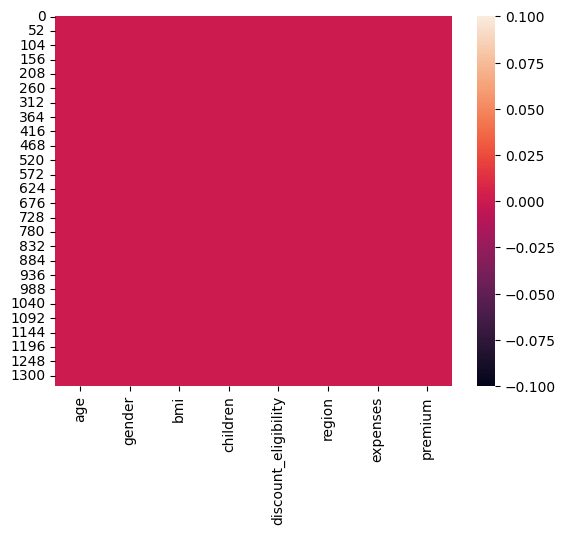

In [ ]:
sns.heatmap(df.isnull()) # from heatmap we see nothing is missing, because there is only one color all around.

In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

now we change categorical columns to numerical

In [12]:
df['gender'].replace({'male':1,'female':0}, inplace = True)
df['discount_eligibility'].replace({'yes':1,'no':0}, inplace= True)
df['region'].replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}, inplace=True)

C:\Users\Ummea\AppData\Local\Temp\ipykernel_65436\4273128023.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'male':1,'female':0}, inplace = True)
C:\Users\Ummea\AppData\Local\Temp\ipykernel_65436\4273128023.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['discount_eligibility'].replace({'yes':1,'no':0}, inplace= True)
C:\Users\Ummea\AppData\Local\Temp\ipykernel_65436\4273128023.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t

In [13]:
df.head(5)

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,0,27.9,0,1,1,16884.92,168.8492
1,18,1,33.8,1,0,2,1725.55,17.2555
2,28,1,33.0,3,0,2,4449.46,44.4946
3,33,1,22.7,0,0,3,21984.47,439.6894
4,32,1,28.9,0,0,3,3866.86,77.3372


In [15]:
df.shape

(1338, 8)

now check statistical description

In [16]:
df.describe()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,2.484305,13270.422414,262.874685
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240,292.532178
min,18.000000,0.000000,16.000000,0.000000,0.000000,1.000000,1121.870000,11.218700
25%,27.000000,0.000000,26.300000,0.000000,0.000000,2.000000,4740.287500,87.354250
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000,174.997400
75%,51.000000,1.000000,34.700000,2.000000,0.000000,3.000000,16639.915000,342.908900
max,64.000000,1.000000,53.100000,5.000000,1.000000,4.000000,63770.430000,1983.106400


In [18]:
# functions for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
x = df[['age']]
y = df['premium']

In [28]:
lm = LinearRegression()

In [30]:
lm.fit(df[['age']], df['premium'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
yhat = lm.predict(x)

In [108]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize = (width, height))
    ax1 = sns.kdeplot(RedFunction, color = 'r', label = RedName)
    ax2 = sns.kdeplot(BlueFunction, color= 'b', label = BlueName, ax = ax1)
    plt.title(Title)
    plt.xlabel('Premium')
    plt.ylabel('Density')
    plt.show()
    plt.close()

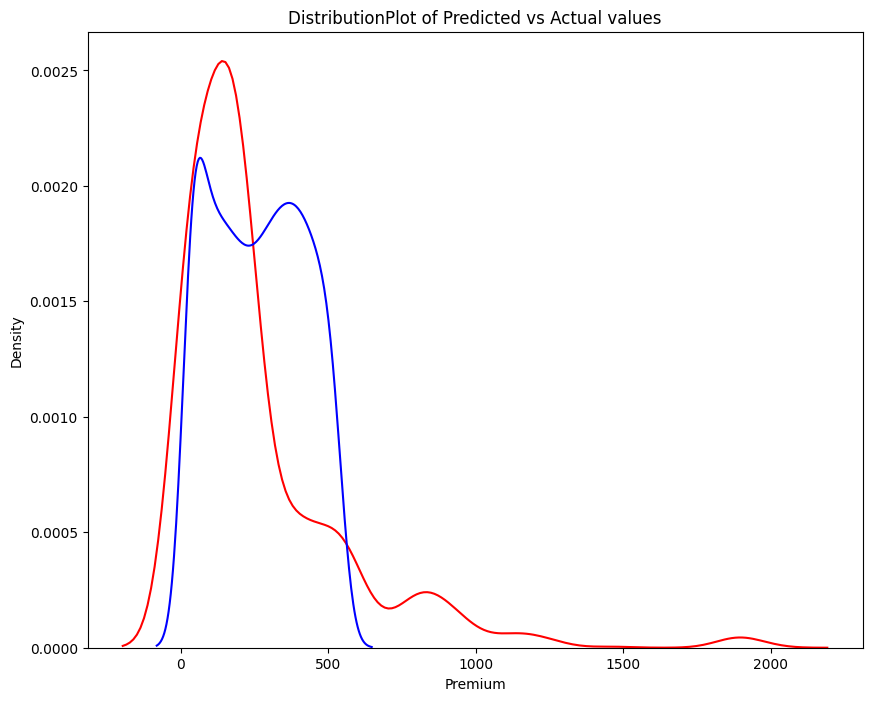

In [66]:
title = 'DistributionPlot of Predicted vs Actual values'
actual_values = df['premium']
predicted_values = yhat
DistributionPlot(RedFunction = actual_values, BlueFunction = predicted_values, RedName = 'Density', BlueName = 'Premium', Title = title)
            


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [73]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [74]:
z = df[['age', 'gender','bmi','discount_eligibility', 'region', 'expenses']]
y = df['premium']

In [76]:
pipe.fit(z,y)

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [77]:
ypipe = pipe.predict(z)

In [78]:
from sklearn.metrics import r2_score, mean_squared_error

In [79]:
r2_score(y,ypipe)

0.902605714349375

In [80]:
mse = mean_squared_error(df['premium'],yhat)
mse

61461.422237379134

What is "Density" on the Plot?
In simple terms, density on this plot shows where the data points are most concentrated.

High Peak: A high peak on the curve means a lot of data points are clustered around that specific value on the x-axis.

Low Flat Area: A low, flat part of the curve means very few data points exist at those values.
This plot compares the distribution of the Actual insurance premiums (red line) with your model's Predicted premiums (blue line).

Here's what it predicts about  model's performance:

Good at Predicting Common Cases: The blue and red peaks are close together on the left. This means  model is fairly good at predicting the lower, more common insurance premiums.

Poor at Predicting High Costs: The red line has a long "tail" to the right, showing that some people have very high actual premiums. The blue line, however, is narrow and doesn't extend into this area. This means  model is not good at predicting these high-cost, outlier cases and will likely underestimate their premiums.

In short, the model is decent for average customers but will likely fail to predict the high costs associated with customers who have more expensive insurance plans.


When a simple model isn't enough, we need more powerful tools. Our linear model isn't "wrong," it's just not complex enough to capture the real-world factors that lead to high insurance premiums.

To get more accurate results, we should use more advanced models and follow a standard machine learning workflow.

Recommended Powerful Models
For this type of problem, where we are predicting a number (the premium), tree-based models are excellent. They are very effective at discovering complex, non-linear patterns in data.

Random Forest Regressor: 🌳

What it is: This model builds many individual decision trees and then averages their predictions. This "wisdom of the crowd" approach makes it very robust and accurate.

Why it's good for you: It's great at handling outliers (like your high-premium customers) and doesn't require as much data preparation as other models.

Gradient Boosting Regressor (like XGBoost or LightGBM): 🚀

What it is: This is often one of the most powerful and popular models for tabular data. It builds a series of models, where each new model focuses on correcting the mistakes of the previous one.

Why it's good : It is typically one of the most accurate models we can use and is a favorite in data science competitions.



Step 1: Split Your Data
Before training, you must split your data into a training set and a testing set. This is the most important step to properly evaluate your model.

Training Set: The model learns from this data.

Testing Set: You use this data (which the model has never seen) to see how good your model actually is.

In [47]:
df.head(2)

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,0,27.9,0,1,1,16884.92,168.8492
1,18,1,33.8,1,0,2,1725.55,17.2555


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [55]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
pipe = Pipeline(Input)

In [56]:
z = df[['age', 'gender','bmi','discount_eligibility', 'region', 'expenses']]
y = df['premium']
pipe.fit(z,y)
Yhat = pipe.predict(z)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(z,y,test_size = 0.2, random_state = 42)

Step 2: Choose and Train a More Powerful Model
Now, use a more powerful model like RandomForestRegressor.

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
# train the model only on the training data
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Step 3: Evaluate on the Test Set
Finally, see how well your model did by making predictions on the test set and comparing them to the actual values.

In [81]:
from sklearn.metrics import r2_score, mean_squared_error


In [82]:
y_pred = rf_model.predict(X_test)
# calculate R- squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mse
r2

0.9903710920041052

In [83]:
mse

891.1043933406835

COMPARISION BETWEEN TWO MODELS LINEAR REGRESSION AND RANDOMFORESTREGRESSOR:
Based on the results , the Random Forest model is significantly better than our Linear Regression model.

Here's a simple comparison of their performance:

R-squared (R²) Score Comparison
Random Forest: 0.99

Linear Regression: 0.90

Winner: Random Forest 🏆

Why: A higher R-squared score is better because it means the model can explain more of the variation in the data.  Random Forest model explains 99% of the premium data, which is a near-perfect fit, while the Linear Regression explains only 90%.

Mean Squared Error (MSE) Comparison
Random Forest: 891.10

Linear Regression: 61,461.42

Winner: Random Forest 🏆

Why: A lower MSE is better because it indicates a smaller average error in the predictions. To make this easier to understand, let's look at the Root Mean Squared Error (the square root of the MSE):

Random Forest Error: Your predictions are off by about $29.85 on average ( 
891.10

​
 ).

Linear Regression Error: our predictions are off by about $247.91 on average ( 
61461.42

​
 ).

Conclusion
The Random Forest model is the clear winner. It is far more accurate, with a higher R-squared value and a much lower prediction error.

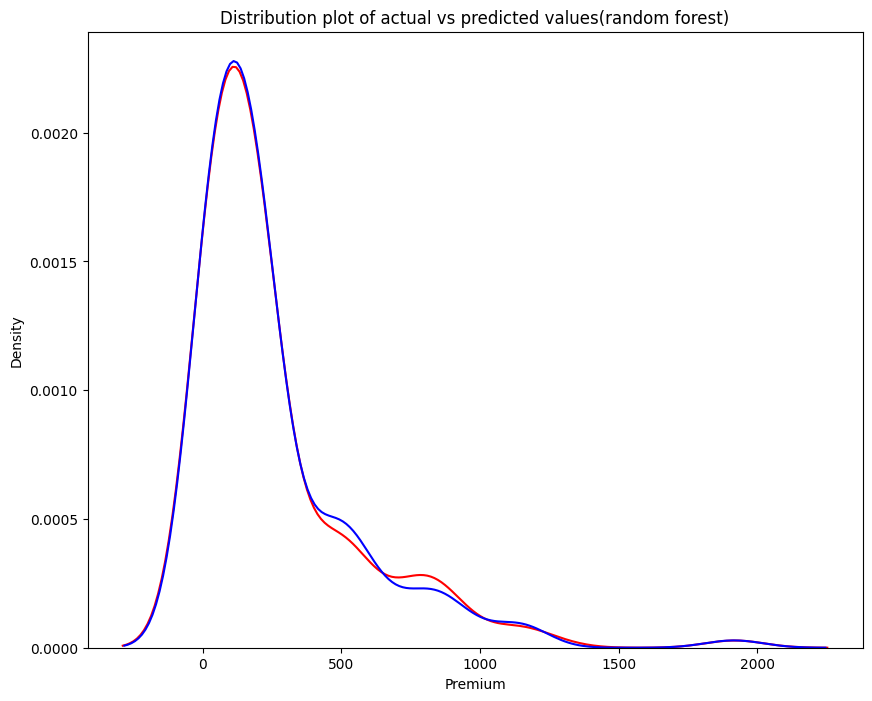

In [84]:
title = 'Distribution plot of actual vs predicted values(random forest)'
DistributionPlot(RedFunction = y_test, BlueFunction = y_pred, RedName = 'Actual Values', BlueName = 'Predicted Values', Title = title)
                 

Interpreting the Plot
This plot compares the distribution of the Actual Premiums (red line) with the predictions from your Random Forest model (blue line).

Excellent Peak Overlap: Notice how the tall peaks on the left for both the red and blue lines are now almost perfectly on top of each other. This means  new model is extremely accurate at predicting the most common, lower-cost premiums.

Better Handling of High Values: The most important improvement is on the right side of the plot. The old model's prediction line dropped off quickly, but the blue line for the Random Forest now extends much further, closely following the red line's "tail." This shows that the Random Forest model is much better at predicting the rare, high-cost premiums.

Why This is a Big Improvement
The closer the blue line is to the red line, the more accurate the model. This plot visually confirms your R-squared score of 0.99, showing that the model's predictions are, on the whole, very close to the real values.

CROSS VALIDATION SCORE to improve the model

In [85]:
from sklearn.model_selection import cross_val_score

In [87]:
scores = cross_val_score(rf_model, z,y, cv=5, scoring = 'r2')
scores

array([0.99905304, 0.99900534, 0.99403043, 0.99696735, 0.99887944])

In [88]:
scores.mean()

np.float64(0.997587119417463)

In [89]:
scores.std()

np.float64(0.001942396288856233)

ANALYSIS:
These are excellent results from your cross-validation. Here's a simple interpretation:

Average R-squared score: 0.9976
This is the most important number. It confirms that your Random Forest model is extremely accurate, explaining about 99.8% of the variation in the premium data. This is a very strong and reliable performance.

Standard deviation: 0.0019
This number is very low, which is great news. It means your model's performance was very consistent across all the different "tests" (or folds) of the cross-validation. It's not just getting lucky on one particular split of the data; it's a stable and trustworthy model.

In [90]:
from sklearn.model_selection import cross_val_predict

In [91]:
Yhat_cv = cross_val_predict(rf_model, z, y, cv =5)

In [92]:
Yhat_cv

array([ 169.037921,   17.261174,   44.194536, ...,   16.302277,
         20.212149, 1178.491372])

What cross_val_predict Does
It's clever in how it works:

It splits your data into 5 parts (or "folds").

It trains a model on 4 parts and makes predictions on the 1 part it held out.

It repeats this process 5 times, each time holding out a different part for testing.

Finally, it stitches together all the predictions from the held-out parts into a single array, yhat_cv.

This gives you a robust set of predictions where every data point was predicted by a model that was never trained on it, providing a very honest evaluation of the model's performance.
These numbers are the predicted insurance premium values for each person in your dataset.

cross_val_predict(...): This command trained and tested the model multiple times to ensure the predictions are reliable.

Yhat_cv: This is the array that stores the final prediction for each row in the data. For example, it predicted a premium of $169.04 for the first person, $17.26 for the second, and $1,178.49 for another person in the dataset.

we can now compare this array of predicted values against the array of actual premium values to see how accurate our model is.

The whole point of model selection is to find a model that is "just right"—not too simple and not too complex.

Underfitting (Too Simple): The model is too basic to understand the underlying patterns in your data. It performs poorly on both the data it was trained on and new data.

Overfitting (Too Complex): The model learns the training data too well, almost like it has memorized it, including the noise. Because of this, it fails to make accurate predictions on new, unseen data.

Good Fit (Just Right): The model learns the general patterns in the data and can make accurate predictions on new data it has never seen before.

How This Applies to our Models
Based on the results, we have a perfect example of an underfitting model and a well-fitting model.

1. Linear/Polynomial Regression: The Underfitting Model
Our first model (Linear Regression with polynomial features) was an example of underfitting.

Evidence:

Its R² score was lower (around 0.90).

The distribution plot showed that it completely failed to predict the high premium values.

Conclusion: It was too simple to capture the complex reasons why some people have very high insurance premiums.

2. Random Forest: The "Just Right" Model
Your Random Forest model is our well-fitting model.

Evidence:

It has an extremely high and consistent cross-validation R² score of ~0.998.

The low standard deviation (0.0019) from cross-validation is key. It shows the model performs consistently well on different subsets of the data, which is a strong sign that it is not overfitting.


In [100]:
X_train.shape

(1070, 6)

In [101]:
X_test.shape

(268, 6)

RIDGE REGRESSION

 Applying Ridge Regression is a great way to create a model that is more robust and less prone to overfitting than a standard linear model.

Ridge Regression works by adding a penalty for large coefficients, which helps to create a more generalized model. The strength of this penalty is controlled by a parameter called alpha.

How to Apply Ridge Regression
Here is a complete plan, with code, to find the best alpha for our model, train it, and evaluate its performance.

Step 1: Find the Best Alpha Using Cross-Validation
The first step is to test a range of different alpha values to see which one performs the best. We can do this efficiently using a loop and cross-validation.
Step 2: Train and Evaluate the Final Ridge Model
Now that we have found the best alpha, we can train the final Ridge Regression model on our training set and evaluate it on our test set.

In [93]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import cross_val_score 
import numpy as np

In [96]:
# define range of alpha values
alphas = [0.1,1,10,100,1000]
mean_r2_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)
    scores = cross_val_score(ridge_model, z,y, cv = 5, scoring = 'r2')
    mean_r2_scores.append(scores.mean())
# find the alpha that gives the best average score
best_alpha = alphas[np.argmax(mean_r2_scores)]
best_alpha

1000

In [97]:
mean_r2_scores

[np.float64(0.814975560126227),
 np.float64(0.8149841236601404),
 np.float64(0.8150556927276684),
 np.float64(0.8153387813905211),
 np.float64(0.8157066442917722)]

In [98]:
max(mean_r2_scores)

np.float64(0.8157066442917722)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [102]:
final_ridge = Ridge(alpha = best_alpha)
final_ridge.fit(X_train,y_train)

,alpha,1000
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [103]:
# make prediction and evaluate
y_pred_ridge = final_ridge.predict(X_test)

In [104]:
r2_ridge = r2_score(y_test, y_pred_ridge)

In [105]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [106]:
r2_ridge

0.8330842371914225

In [107]:
mse_ridge

15447.169047616719

analysis
R-squared (R² Score): 0.833
What it means: This score indicates that our Ridge model can explain about 83.3% of the variation in the insurance premium data.

Interpretation: This is a strong score, showing that our model has a good predictive capability.

Mean Squared Error (MSE): 15447.17
What it means: This number represents the average squared difference between our model's predicted premiums and the actual ones. To make this easier to understand, we can find the Root Mean Squared Error (RMSE).

Interpretation:

The RMSE is the square root of the MSE:  
15447.17

​
 ≈124.28.

This means that, on average, your Ridge model's predictions are off by about $124.28.

Overall, your Ridge Regression model is a strong performer with good accuracy.

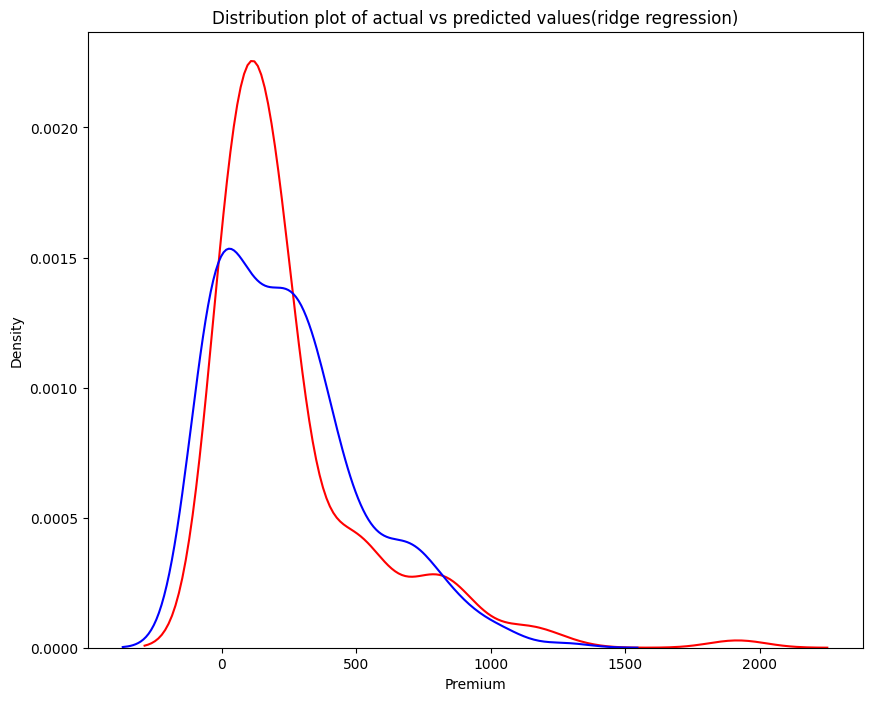

In [113]:
title = 'Distribution plot of actual vs predicted values(ridge regression)'
DistributionPlot(RedFunction = y_test, BlueFunction = y_pred_ridge, RedName = 'Actual Values', BlueName = 'Predicted Values', Title = title)

COMPARISION BETWEEN TWO MODELS RANDOM FOREST REGRESSOR AND RIDGE REGRESSOR MODEL 
For our project, the Random Forest was the clear winner because it delivered much higher accuracy, proving the relationships in your data were more complex than a linear model could handle

GRID SEARCH 

 Using GridSearchCV is the standard way to fine-tune your model to get the best possible performance.  RandomForestRegressor has several "settings" (called hyperparameters) that you can adjust, like the number of trees in the forest or how deep each tree can be. GridSearchCV automatically tests different combinations of these settings and tells you which combination works best. best_rf_model, which is the most optimized version of your Random Forest model. You can use this "best" model to make your final predictions, confident that it has been fine-tuned for the best possible performance on your dataset.

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameters = {'n_estimators': [100,200], 'max_depth': [None, 10, 20], 'min_samples_leaf': [1,2,4]}

In [116]:
# create and run the grid search
rf = RandomForestRegressor(random_state = 42)
grid_search = GridSearchCV(estimator = rf, param_grid = parameters, cv = 5, scoring = 'r2', n_jobs = -1)

In [117]:
grid_search.fit(z,y)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


best model and its score

In [118]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}

In [119]:
grid_search.best_score_

np.float64(0.9978031550579705)

In [120]:
best_rf_model = grid_search.best_estimator_

In [121]:
best_rf_model

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [122]:
# convert the grid search results to a dataframe
results = pd.DataFrame(grid_search.cv_results_)

In [123]:
results_200_estimators = results[results['param_n_estimators'] == 200]

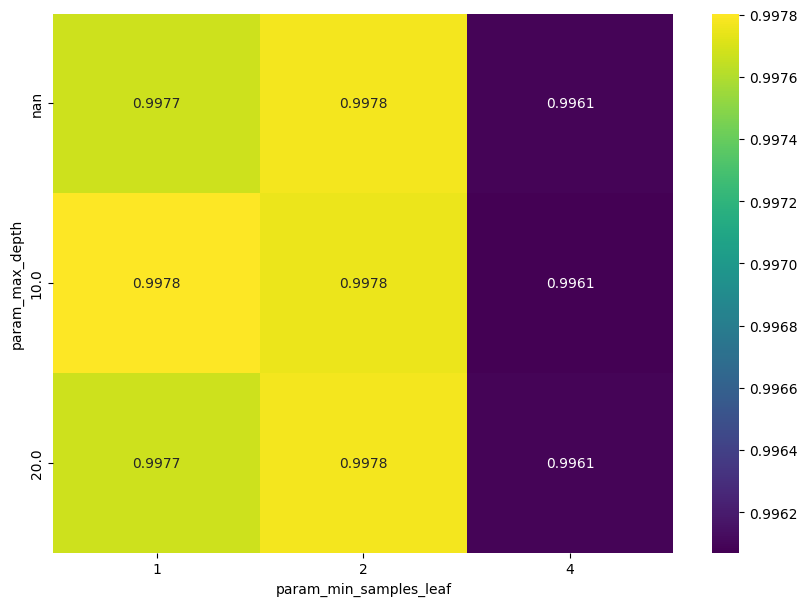

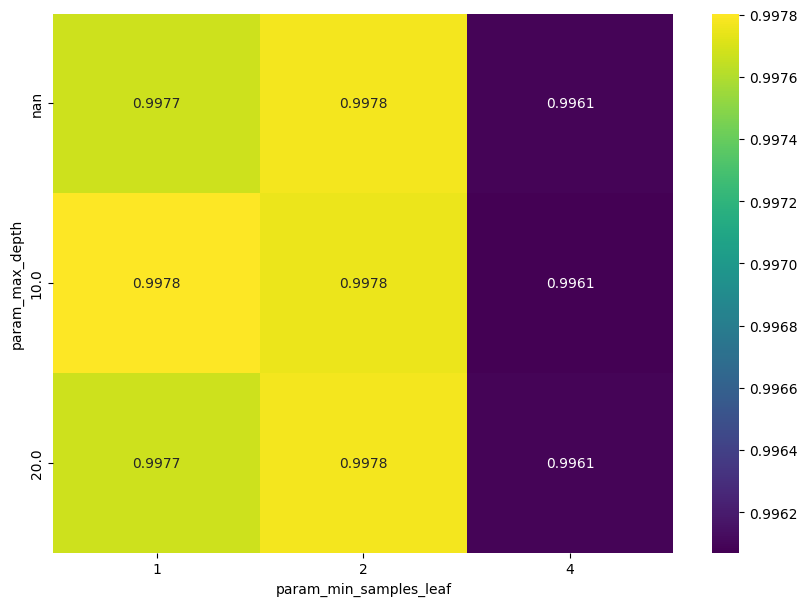

In [126]:
# pivot the data to dreate a matrix for heatmap
pivot_table = results_200_estimators.pivot(
    index = 'param_max_depth',
    columns = 'param_min_samples_leaf',
    values = 'mean_test_score'
)

# create a heatmap
plt.figure(figsize = (10, 7))
sns.heatmap(pivot_table, annot = True, fmt = '.4g', cmap = 'viridis')
plt.show()

ANALYSIS
This heatmap shows the results of our GridSearchCV, testing different settings for our model to find the best-performing combination.

Axes: The y-axis shows the maximum depth of the model's trees (param_max_depth), and the x-axis shows the minimum number of samples required at each leaf (param_min_samples_leaf).

Color: The color of each square indicates the R-squared score, with brighter yellow colors representing higher, more accurate scores.

Numbers: The number in each square is the actual R-squared score for that combination of settings.

In short, the plot shows that the best R-squared score of 0.9978 was a

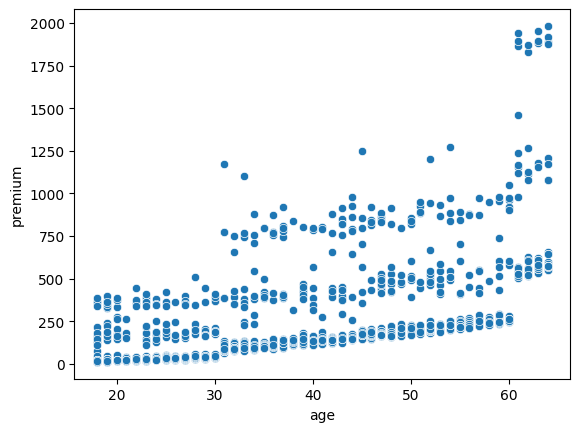

In [127]:
sns.scatterplot(x = 'age', y = 'premium', data = df)
plt.show()

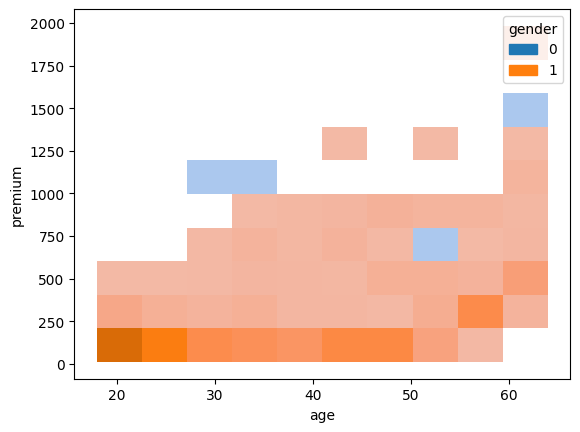

In [129]:
sns.histplot(x = 'age', y = 'premium', data = df , hue = 'gender', bins = 10, kde = True)
plt.show()

ANALYSIS:
In the dataset, females tend to have a wider range of premium costs and are more likely to have higher premiums than males. as female = 0, and male = 1.

In [130]:
df.head(3)

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,0,27.9,0,1,1,16884.92,168.8492
1,18,1,33.8,1,0,2,1725.55,17.2555
2,28,1,33.0,3,0,2,4449.46,44.4946


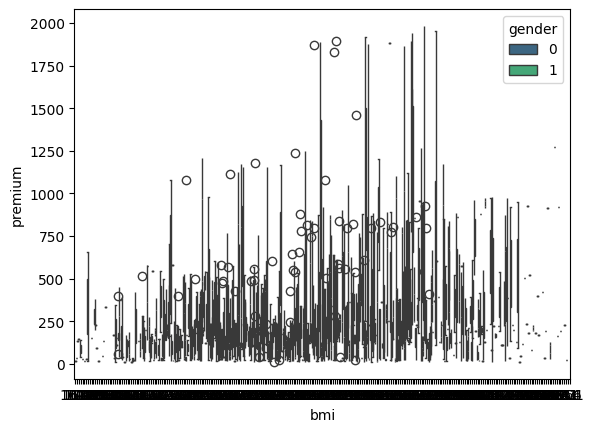

In [136]:
sns.boxplot( x = 'bmi', y = 'premium' , data = df, hue = 'gender' , palette = 'viridis' )
plt.show()

ANALYSIS:
Positive Correlation: There is a general trend that as BMI increases, the insurance premium also tends to increase.

Increased Variability with Higher BMI: At lower BMI values, the premiums are clustered together. At higher BMI values, there is a much wider range of premium costs, indicating that BMI is a more significant factor for higher premiums.

Outliers: The circles represent outlier data points, showing that some individuals have exceptionally high premiums for their BMI.

Gender: Without a clear legend, it's difficult to definitively compare the genders. However, the overlapping boxes suggest that for any given BMI, there is a similar range of premiums for both genders, though one may have a slightly higher median than the other.

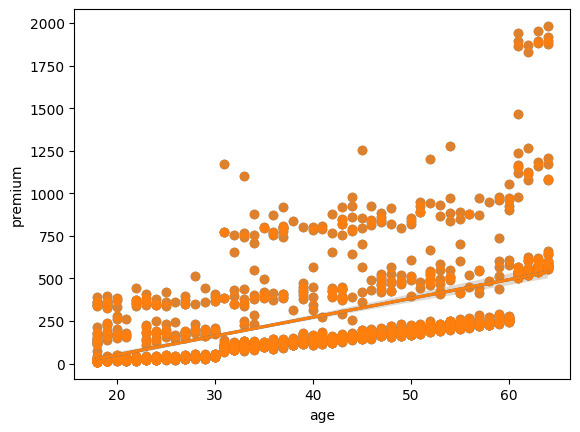

In [138]:
sns.regplot(x = 'age', y = 'premium', data = df)
plt.show()

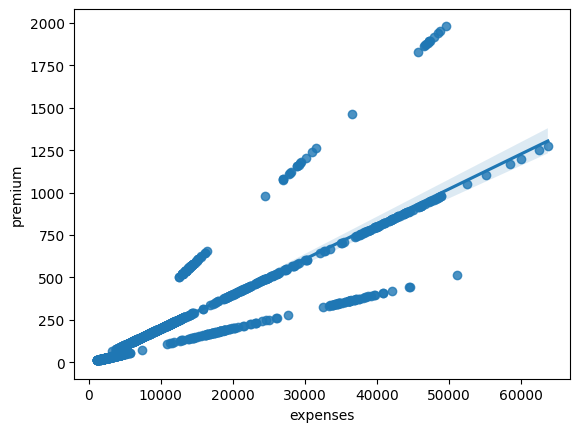

In [140]:
sns.regplot(x = 'expenses', y = 'premium', data = df)
plt.show()

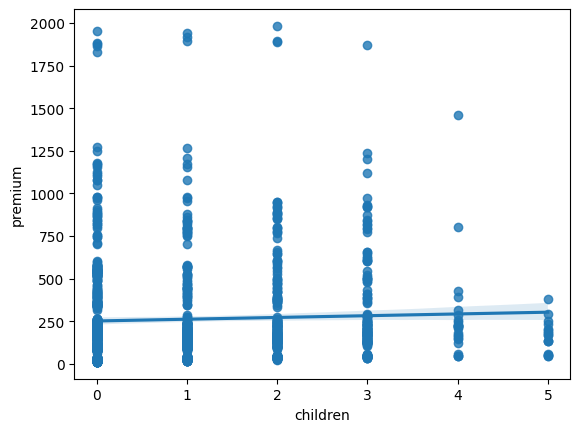

In [141]:
sns.regplot(x = 'children', y = 'premium', data = df)
plt.show()

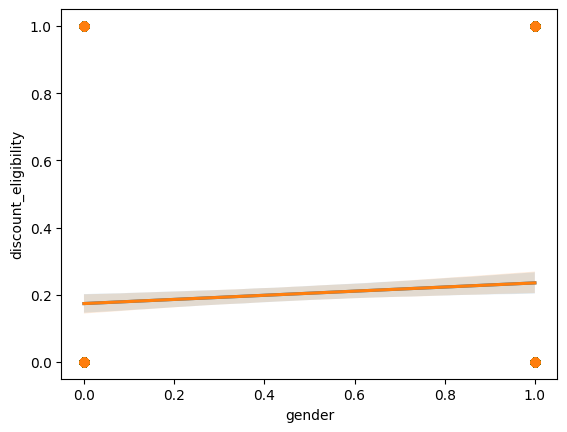

In [143]:
sns.regplot(x = 'gender', y = 'discount_eligibility', data = df)
plt.show()

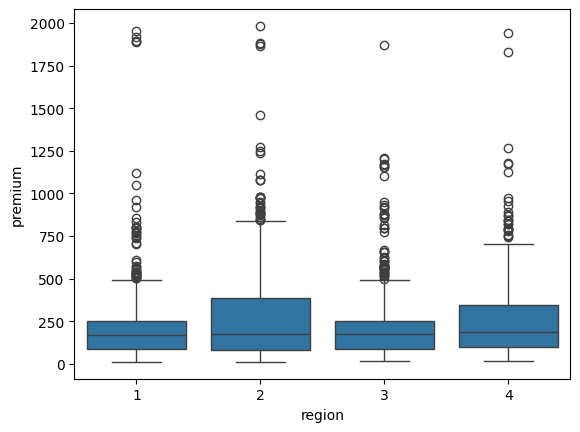

In [153]:
sns.boxplot(x = 'region', y = 'premium', data = df)
plt.show()

ANALYSIS:
Median Premiums: The horizontal line inside each box represents the median premium. Region 2 has the highest median premium, while Region 3 appears to have the lowest.

Variability: The height of the boxes shows the spread of the middle 50% of premiums. Region 2 also has the largest spread, meaning there is a wider range of premium costs in that region compared to the others.

Outliers: The circles above the main "whiskers" of the boxes are outliers. All four regions have a significant number of individuals with much higher premiums than the average, but Region 2 stands out with the highest premium outlier, close to 2000.

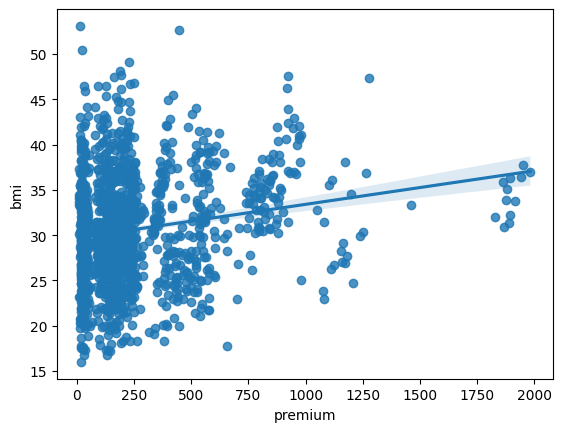

In [156]:
sns.regplot(x = 'premium', y = 'bmi', data = df)
plt.show()

ANALYSIS:
There is a weak positive correlation between premium and BMI. As the premium increases, the BMI of the individual also tends to increase slightly. However, the data points are widely scattered, indicating that many other factors besides BMI influence the premium cost.

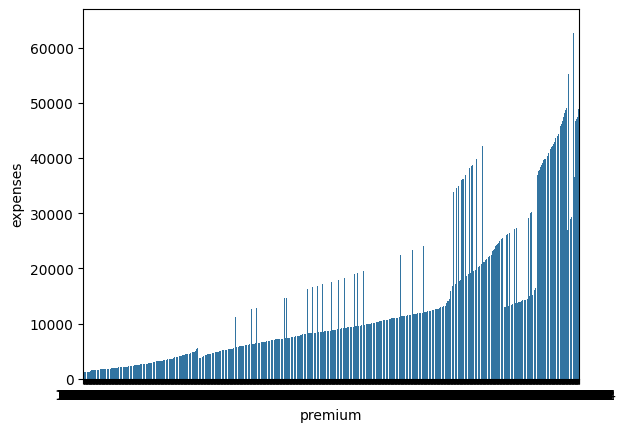

In [166]:
sns.barplot(x = 'premium', y = 'expenses', data = df)
plt.show()

ANALYSIS:
There is a strong positive correlation between the premium and the expenses. As the premium increases (moving from left to right), the total medical expenses also tend to increase significantly. This indicates that higher insurance premiums are associated with individuals who have higher medical costs.

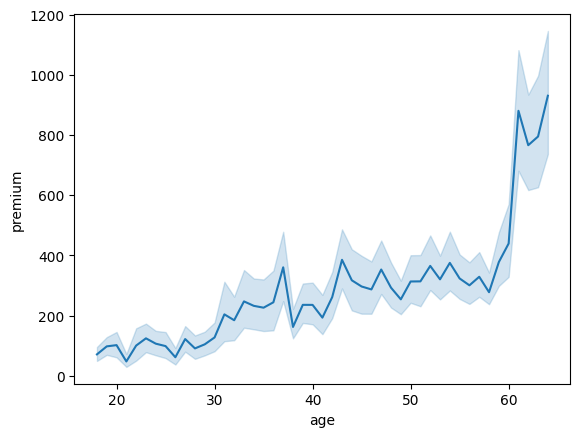

In [169]:
sns.lineplot(x = 'age', y = 'premium', data = df)
plt.show()

ANALYSIS:
sitive Trend: There is a clear upward trend. As age increases, the average premium also increases.

Accelerated Increase in Later Years: The line becomes much steeper after age 60, indicating that the premium costs increase much more rapidly for older individuals.

Variability: The shaded area shows that factors other than age also affect the premium, as people of the same age can have different premium costs.

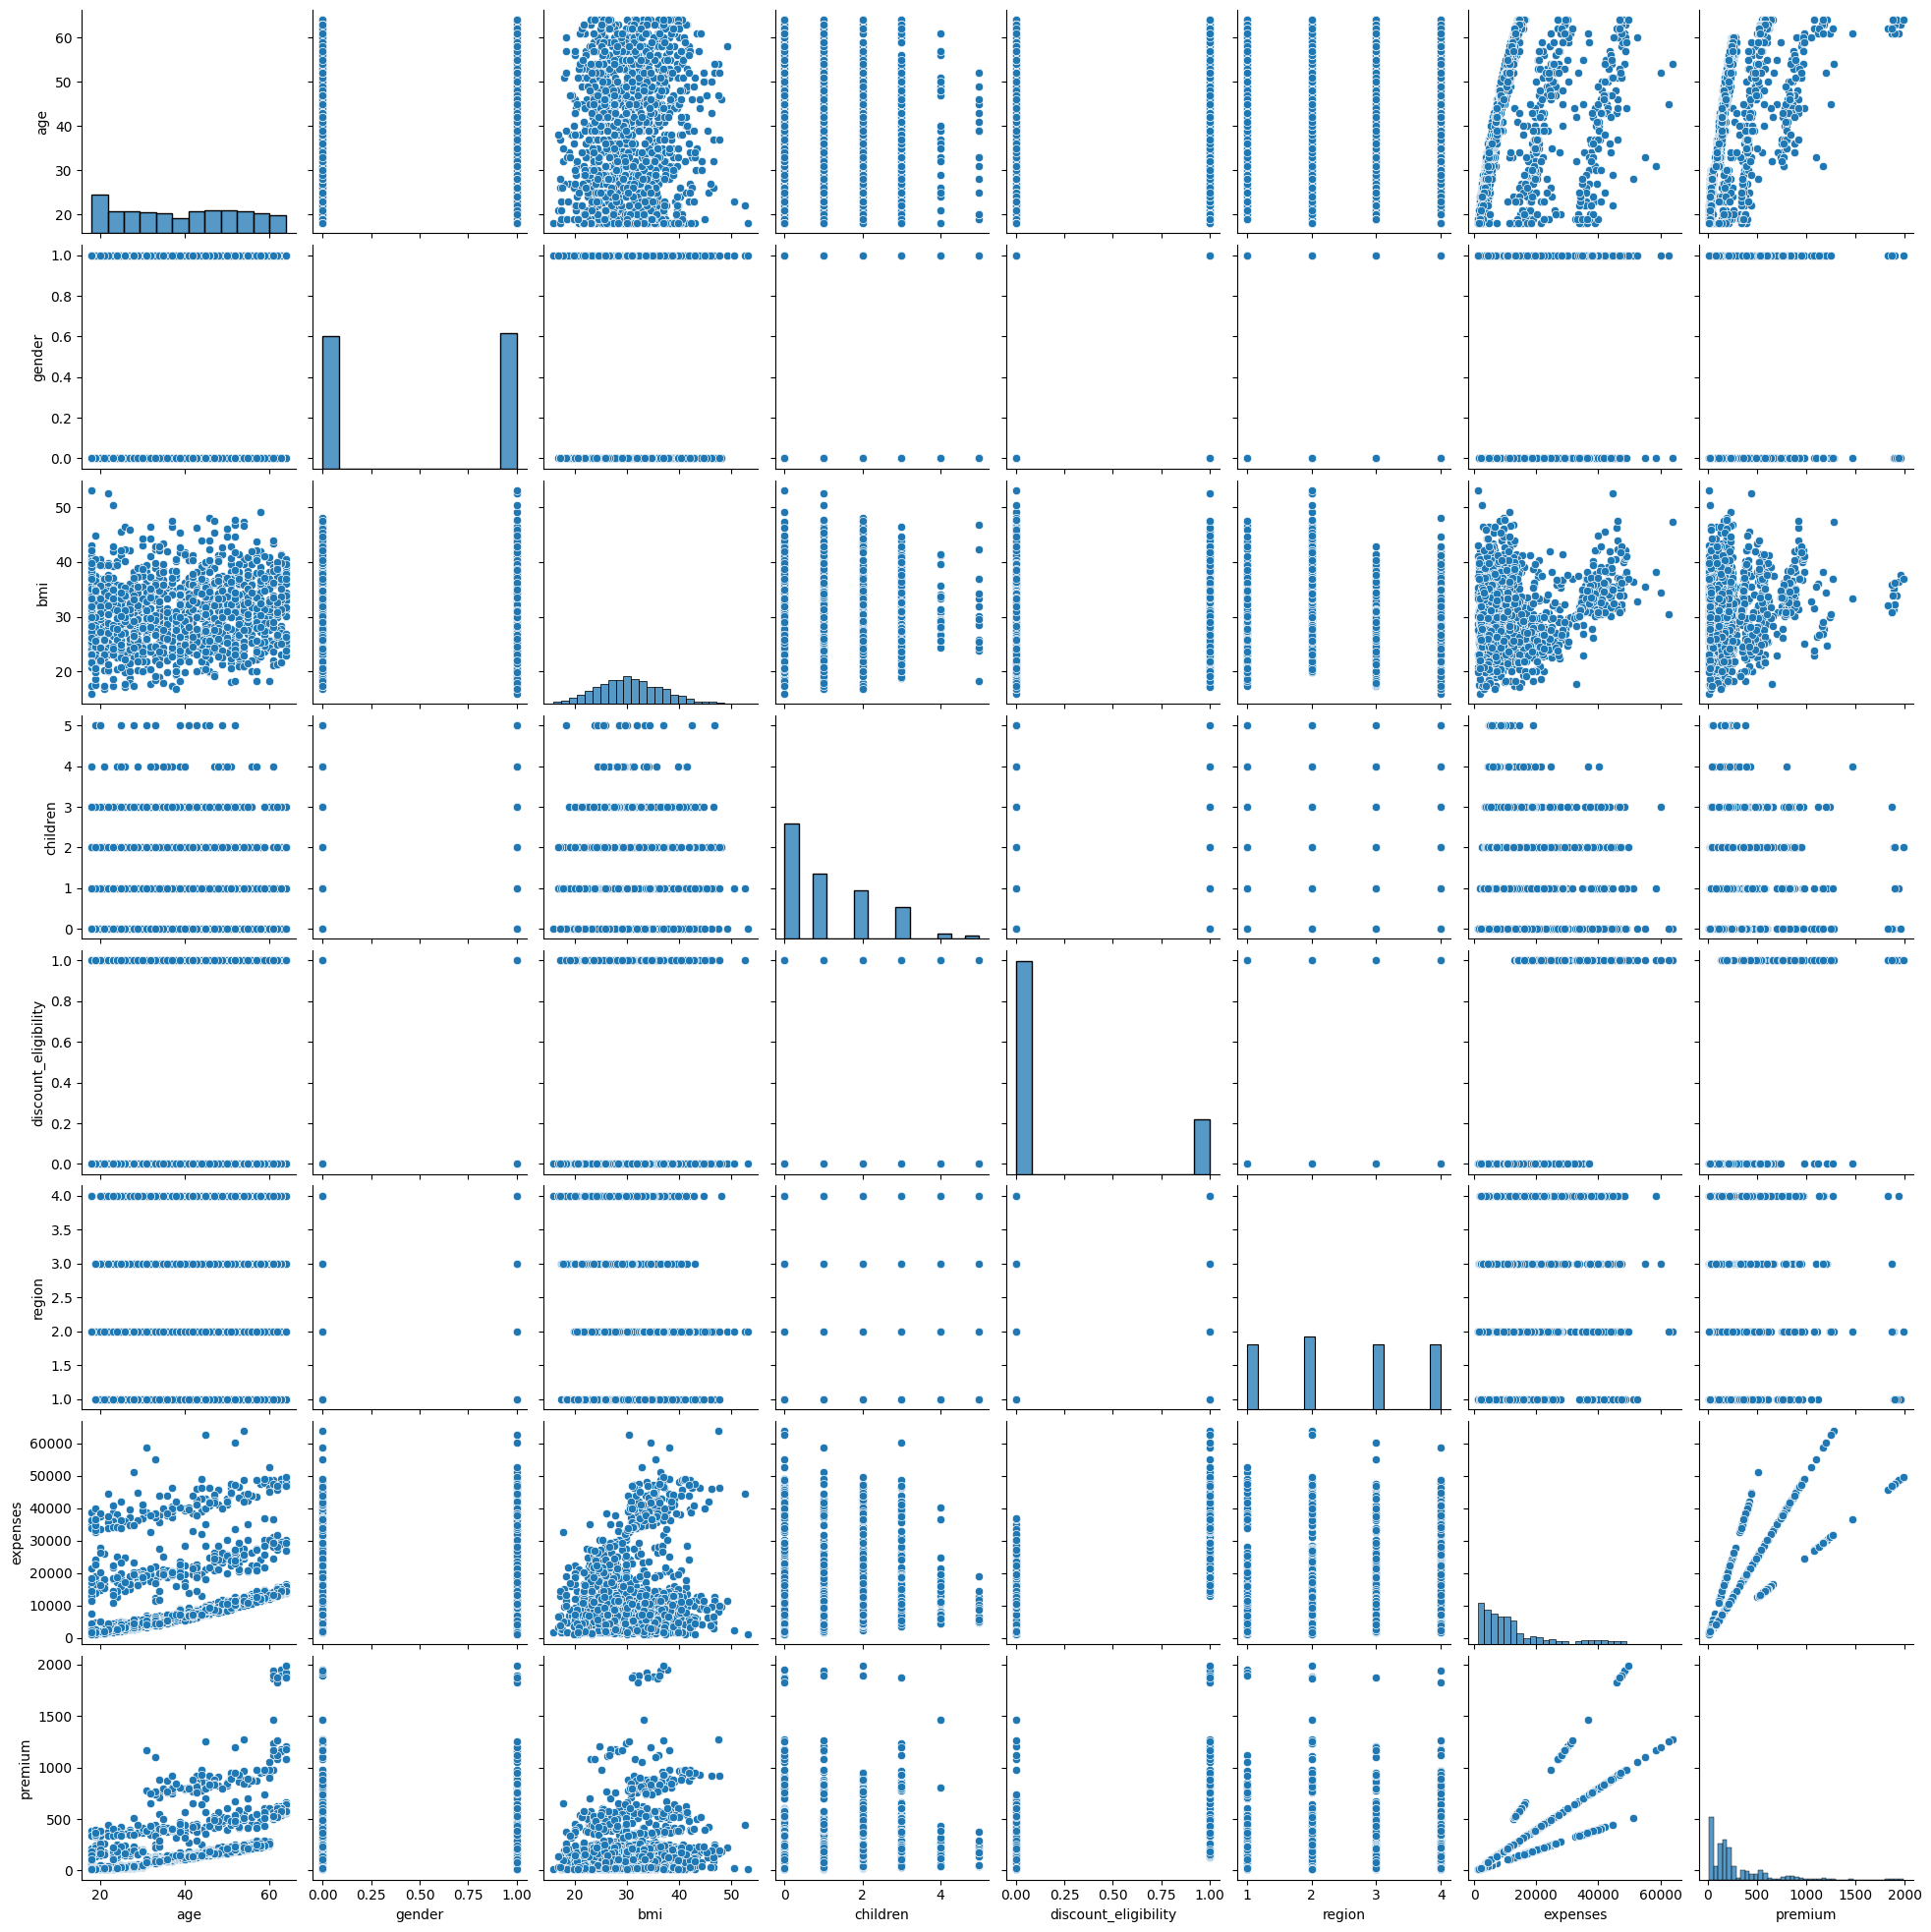

In [165]:
sns.pairplot(data = df )
plt.show()

A pair plot helps to see the relationships between multiple variables in the dataset at once. 